# K-Nearest Neighbors Classifier 

**kNN** can classify examples by assigning them the class of similarly labeled examples.<br>
**kNN** is well suited for classification tasks where the relationship between features are very hard to understand.<br>
The **training dataset** contains examples that have been classifed into several categories.<br>
We have a new example(with the same number of features as the training data). The **kNN** algorithm identifies **k** elements in the training dataset that are nearest in similarity.<br>
The **unlabeled test example** is assigned the **class** of it's **nearest neighbors** that have similar features.   

Consider the data in the table below.We have **features** foreach data entry.<br>
Those features are Ingredient, Sweetness(Parameter) and Crunchiness(Parameter).<br>
Parameters from 1-10.<br>
Each entry also has a **label** (given by Food-Type).<br>
Based on the data **kNN** will classify the data ino 3 classes -- **fruit, protein or vegetable**.<br>
Any new entry after training will be classified into one of these 3 classes or will be an outlier.<br>
Say, the new entry is **tomato*** with Sweetness **6** and Crunchiness **4**. Where will it fit???<br>
We use a **distance function (like Euclidean Distance)** to classify the new data.

<table>
    <thead>
        <tr style="color:green">
            <td>Ingredient</td>
            <td>Sweetness</td>
            <td>Crunchiness</td>
            <td>Food-Type</td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Apple</td>
            <td>10</td>
            <td>9</td>
            <td>fruit</td>
        </tr>
       <tr>
            <td>Bacon</td>
            <td>1</td>
            <td>4</td>
            <td>protein</td>
        </tr>
       <tr>
            <td>Banana</td>
            <td>10</td>
            <td>1</td>
            <td>fruit</td>
        </tr>
       <tr>
            <td>Carrot</td>
            <td>7</td>
            <td>10</td>
            <td>vegetable</td>
        </tr>       
        <tr>
            <td>Deagon Fruit</td>
            <td>1</td>
            <td>1</td>
            <td>fruit</td>
        </tr>
        <tr style="color:red">
            <td>Tomato</td>
            <td>6</td>
            <td>4</td>
            <td>???</td>
        </tr>
    </tbody>
</table>

## Lazy learner algorithm 

Lazy learners **do not learn anything**!!!<br>
We just store the training data.There is <strong><span style="color:red">NO TRAINING AT ALL<span></strong>.<br>
Making Predictions is rather slow as there are a lot of distances to calculate.<br>
**WE DO NOT BIULD A MODEL**. This is an example of non-parametric learning.So no need to use an optimization algorithm.No $\beta$ parameters.<br>    

## Euclidean Distance

The **Euclidean Distance** Between two points $P_1$ and $P_2$ is: <br><br> 
$dist(P_1,P_2) = \sqrt{(x_{p_1} - x_{p_2})^2 + (y_{p_1} - y_{p_2})^2 + (z_{p_1} - z_{p_2})^2+ \ ... \ + (f_{p_1} - f_{p_2})^2 }$<br><br>
Where $x_{p_1} \ to \ f_{p_1} $ represents all the dimensions of point $P_1$. Same goes for $P_2$.<br>

### Let's apply this to our dataset to  <span style ="color:red">CLASSIFY TOMATO</span> 

$dist(tomato,carrot)\ = \sqrt{(6-7)^2+(4-10)^2} \ \ $ = **6.803**<br>
$dist(tomato,apple) \ \ = \sqrt{(6-10)^2+(4-9)^2}\  \ $   = **6.403**<br>
$dist(tomato,bacon) \ \ = \sqrt{(6-1)^2+(4-4)^2} \ \ \ \ $  = **5**<br>
$dist(tomato,banana)  =  \ \sqrt{(6-10)^2+(4-1)^2} \   $ = **5**<br>
$dist(tomato,dragon fruit) \ = \sqrt{(6-1)^2+(4-1)^2}  $  = **5.88**<br><br>
Now we have to consider the k-parameters -- <br>
**If k=1** We consider the **smallest distance**  : Bacon and Banana.<br>
**If k=2** We consider the **2 smallest distances** : Bacon and Banana. So there is 50% chance that tomato is a protein and 50% chance that tomato is a fruit.<br>
**If k=3** We consider the **3 smallest distance** : Bacon,Banana and Dragon Fruit.Because tomato is closer to 2 fruits and 1 protien, It is a <span style="color:red">FRUIT</span>.


### How to choose this "k" value ??? 

**k** value will determine how  many neighbors to use for the classification. This will affect how the model will generalize and work on other datasets.<br>
**k is small** -- Noisy data or outliers have a huge impact on our classifier. This is called **overfitting** (The model will have high variance and will be less biased).<br>
**k is large** &nbsp;-- The classifer has a tendency to predict the majority class regardless of which neighbors are nearest. This is called **underfitting** (Variance is small but there will be high bias).<br>
<strong><span style="color:red">WE HAVE TO CHOOSE THE "k" VALUE CAREFULLY!!!</span></strong>

# <span style="color:midnightblue"> CODE </span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#The data is split into two classes Blue and Red
# xBlue and yBlue are the features of the Blue class represented as points in a 2D space
xBlue = np.array([0.3,0.5,1,1.4,1.7,2])
yBlue = np.array([1,4.5,2.3,1.9,8.9,4.1])

# xRed and yRed are the features of the Red class represented as points in a 2D space
xRed = np.array([3.3,3.5,4,4.4,5.7,6])
yRed = np.array([7,1.5,6.3,1.9,2.9,7.1])

#X below is the collection of all points in the dataset
#y below if the the labels for each point in X
X = np.array([[0.3,1],[0.5,4.5],[1,2.3],[1.4,1.9],[1.7,8.9],[2,4.1],[3.3,7],[3.5,1.5],[4,6.3],[4.4,1.9],[5.7,2.9],[6,7.1]])
y = np.array([0,0,0,0,0,0,1,1,1,1,1,1]) # 0: blue class, 1: red class

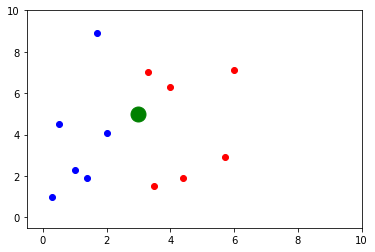

In [8]:
#Lets plot this out
plt.plot(xBlue,yBlue,"ro",color="blue")
plt.plot(xRed,yRed,"ro",color="red")

#Point to classify
plt.plot(3,5,"ro",color="green",markersize=15)
plt.axis([-0.5,10,-0.5,10])
plt.show()

In [18]:
#Let's classify the data
classifier = KNeighborsClassifier(n_neighbors=3) #k-value
classifier.fit(X,y)

#Let's make a prediction
pred_1 = classifier.predict(np.array([[3,5]]))
pred_2 = classifier.predict(np.array([[1,3]]))
print(f"Classifier's Prediction for a new point with features 3,5 "+ 
      f"(green point in our graph) is : {pred_1} that is the red class.")
print(f"Classifier's Prediction for a new point with features 1,3 "+ 
      f" is : {pred_2} that is the blue class.")

Classifier's Prediction for a new point with features 3,5 (green point in our graph) is : [1] that is the red class.
Classifier's Prediction for a new point with features 1,3  is : [0] that is the blue class.


## <span style="color:midnightblue"> Let's try out a serious example!<span>

Let's use the credit_data.csv file used for logistic regression.

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing #for min-max transformation and z-tranformation

In [55]:
data = pd.read_csv("../LogisticRegression/credit_data.csv")
print(data.describe())

features = data[["income","age","loan"]]
target = data.default
 
X_data = np.array(features).reshape(-1,3)
y_data = np.array(target)

          clientid        income          age          loan          LTI  \
count  2000.000000   2000.000000  2000.000000   2000.000000  2000.000000   
mean   1000.500000  45331.600018    40.927143   4444.369695     0.098403   
std     577.494589  14326.327119    13.262450   3045.410024     0.057620   
min       1.000000  20014.489470    18.055189      1.377630     0.000049   
25%     500.750000  32796.459717    29.062492   1939.708847     0.047903   
50%    1000.500000  45789.117313    41.382673   3974.719419     0.099437   
75%    1500.250000  57791.281668    52.596993   6432.410625     0.147585   
max    2000.000000  69995.685578    63.971796  13766.051239     0.199938   

           default  
count  2000.000000  
mean      0.141500  
std       0.348624  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


WE HAVE TO USE PREPROCESSING AND APPLY MIN_MAX TRANFORMATION ON THE FEATURES

### Normalization 

Features are usually transformed into a range before the kNN algorihtm is applied.<br>
This is because the distance formula depends on how features are measured.<br>
If cerntain features have a much larger value than others then the ditance measurements will be strongly dominated by the large values.<br>
We have to rescale the feautures such that each one contributes equally to the distance formula.<br>
For this we use--<br>
&nbsp;&nbsp;&nbsp;1.&nbsp; **min-max normalization**<br>
&nbsp;&nbsp;&nbsp;2.&nbsp; **z-score normalization**

### min-max normalization 

This process transforms features such that all its values lie between 0 and 1.<br>
Normalized values can be interpreted as how far the each of those values fall between the **minima** and **maxima**.<br>
<br>
$X_{new} = \frac{X \ - \ min(X)}{max(X) \ - \ min(X)}$<br><br>
We would like to use min-max normalization on the income features.

###  z-score normalization (standardization) 

The algorithm uses mean and standard deviation to normalize the data.<br><br>
$X_{new} = \frac{X \ - \ X_{mean}}{StandardDeviation(X)}$<br><br>
These values are not within 0-1.<br> Used for principle component analysis.

In [56]:
print("X-data before normalization---")
print(X_data)

X-data before normalization---
[[6.61559251e+04 5.90170151e+01 8.10653213e+03]
 [3.44151540e+04 4.81171531e+01 6.56474502e+03]
 [5.73171701e+04 6.31080495e+01 8.02095330e+03]
 ...
 [4.43114493e+04 2.80171669e+01 5.52278669e+03]
 [4.37560566e+04 6.39717958e+01 1.62272260e+03]
 [6.94365796e+04 5.61526170e+01 7.37883360e+03]]


In [57]:
X_data = preprocessing.MinMaxScaler().fit_transform(X_data)
print("X-data after normalization---")
print(X_data)

X-data after normalization---
[[0.9231759  0.89209175 0.58883739]
 [0.28812165 0.65470788 0.47682695]
 [0.74633429 0.9811888  0.58262011]
 ...
 [0.48612202 0.21695807 0.40112895]
 [0.47500998 1.         0.1177903 ]
 [0.98881367 0.82970913 0.53597028]]


In [39]:
#train-test-split
features_train,features_test,target_train,target_test = train_test_split(X_data,y_data,test_size=0.3)

In [74]:
#Let's run the classifier on our data
model = KNeighborsClassifier(n_neighbors=30)
fitted_model = model.fit(features_train,target_train)
predictions = fitted_model.predict(features_test)

In [76]:
#Let's see our prediction results
print("Confusion Matrix -- ")
print(confusion_matrix(target_test,predictions))
print()
print(f"Accuracy score is : {accuracy_score(target_test,predictions)}")

Confusion Matrix -- 
[[503   1]
 [ 17  79]]

Accuracy score is : 0.97


**This score outperforms Logistic Regression.**

### Using K-Folds Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score

Lets run the knn classification 99 times with diffrent values for k.<br>
For each iteration a value for k is used to classify the data.<br>
Using 10 folds the score for each fold for a value of k is calculated.<br>
We take the mean score for each k and append it to an array.<br>
Calculate the max of this array which gives us the optimal value of k!!!

In [79]:
#Let's calculate optimal k-value
cross_valid_scores = []

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_data, y_data, cv=10, scoring='accuracy')
    cross_valid_scores.append(scores.mean())


In [81]:
print(f"Optimal k with cross-validation: {np.argmax(cross_valid_scores)} and the accuracy score is is {max(cross_valid_scores)}.")
optimal_k = np.argmax(cross_valid_scores)

Optimal k with cross-validation: 28 and the accuracy score is is 0.9845122628065702


In [77]:
model_CV = KNeighborsClassifier(n_neighbors=optimal_k)
fitted_model_CV = model.fit(features_train, target_train)
predictions_CV = fitted_model_CV.predict(features_test)
print(confusion_matrix(target_test, predictions_CV))
print(accuracy_score(target_test, predictions_CV))

28
[[503   1]
 [ 17  79]]
0.97


**For the score above Cross Validation was not used(but we used optimal k) so the score is 1.4% lower**.

# <span style="color:green">END!</span> 